In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('googleplaystore.csv')
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None
            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max   

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.isnull().sum()
df1=df.dropna()
print(df1.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [5]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [6]:
df1.Size.value_counts()

Varies with device    1637
14M                    165
12M                    161
11M                    159
15M                    159
                      ... 
619k                     1
400k                     1
27k                      1
121k                     1
306k                     1
Name: Size, Length: 413, dtype: int64

In [7]:
df1['Size'] = df1['Size'].apply(lambda x : np.nan if x == 'Varies with device' else x)

In [8]:
df1['Size'] = df1['Size'].apply(lambda x : np.float(x.replace('M',''))*1000 if type(x) != float and 'M'in x  else x)

In [9]:
df1['Size'] = df1['Size'].apply(lambda x : np.float(x.replace('k','')) if type(x) != float and 'k'in x  else x)

In [10]:
df1['Size'].astype(float)   


0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10834     2600.0
10836    53000.0
10837     3600.0
10839        NaN
10840    19000.0
Name: Size, Length: 9360, dtype: float64

In [11]:
df1['Size'] = df1['Size'].fillna(method = 'bfill')

## not specified in the project what to do with rows in df['Size'] with values 'Varies with device', 
##Thats why filled with 'bfill'


In [12]:
df1['Reviews'] = df1['Reviews'].astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int32  
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), int32(1), object(10)
memory usage: 987.2+ KB


In [13]:
df1['Installs'].value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [14]:
df1['Installs'] = df1['Installs'].apply(lambda x : (x.replace('+','')) if type(x) != float and '+' in x  else x)
df1['Installs'] = df1['Installs'].apply(lambda x : np.int(x.replace(',','')) if type(x) != float and ',' in x else x)
df1['Installs'] = df1['Installs'].astype(int)

In [15]:
df1['Price'] = df1['Price'].apply(lambda x : np.float(x.replace('$','')) if type(x) != float and '$' in x else x)
df1['Price'] = df1['Price'].astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int32  
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   int32  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 950.6+ KB


In [16]:
## Sanity Checks
df1[df1['Rating']>5]

## no ratings above 5 for any apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [17]:
df1[df1['Reviews']>df1['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,196.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [18]:
df1 = df1.drop([2454,4663,5917,6700,7402,8591,10697], axis = 0)
df1[df1['Reviews']>df1['Installs']]
## values with reviews > Installs dropped

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [19]:
df1[(df1['Type'] == 'Free') & (df1['Price'] > 0)] 

## there are no values Where the Type is 'Free' and Price is > 0

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


<AxesSubplot:xlabel='Price'>

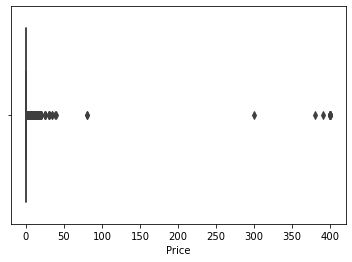

In [20]:
## Performing univariate analysis
sns.boxplot(df1['Price'])
## 
## Most apps aon google play are free a few apps are paid. Out of the paid apps, some apps cost upwards of $200 which are outliers.


<AxesSubplot:xlabel='Reviews'>

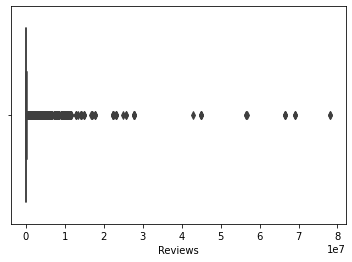

In [21]:
sns.boxplot(df1['Reviews'])

## most of the reviews foe apps are < 1,000,000. There are many apps with 10 million + reviews which go upto 80 million in some cases 

(array([  17.,   18.,   41.,   74.,  137.,  445.,  879., 1660., 4172.,
        1910.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

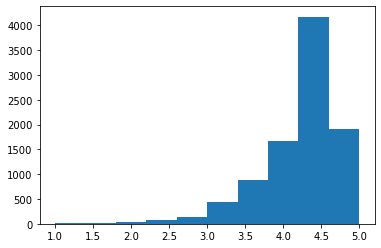

In [22]:
plt.hist(df1['Rating'])
## The ratings for apps are on the higher side as most apps have avg rating of 4.5. 
##Some apps are observed to have rating of 5 as well.

(array([3814., 1763., 1223.,  741.,  539.,  417.,  276.,  189.,  148.,
         243.]),
 array([8.500000e+00, 1.000765e+04, 2.000680e+04, 3.000595e+04,
        4.000510e+04, 5.000425e+04, 6.000340e+04, 7.000255e+04,
        8.000170e+04, 9.000085e+04, 1.000000e+05]),
 <BarContainer object of 10 artists>)

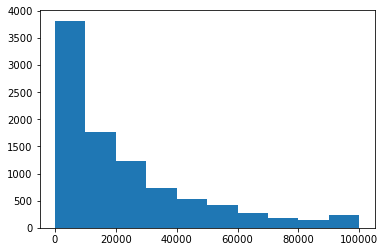

In [23]:
plt.hist(df1['Size'])
## Most of the apps have size < 10 MB. 

In [24]:
## Outlier treatment
df_pricedrop = df1[df1['Price'] > 200]
df1= df1.append(df_pricedrop).drop_duplicates(keep=False)
df1[df1['Price'] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [25]:
df_reviews= df1[df1['Reviews'] > 2000000]
df1= df1.append(df_reviews).drop_duplicates(keep=False)
df1[df1['Reviews'] > 2000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [26]:
print(df1.Installs.quantile(0.1))
print(df1.Installs.quantile(0.25))
print(df1.Installs.quantile(0.5))
print(df1.Installs.quantile(0.7))
print(df1.Installs.quantile(0.9))
print(df1.Installs.quantile(0.95))
print(df1.Installs.quantile(0.99))

1000.0
10000.0
100000.0
1000000.0
10000000.0
10000000.0
100000000.0


<AxesSubplot:xlabel='Installs'>

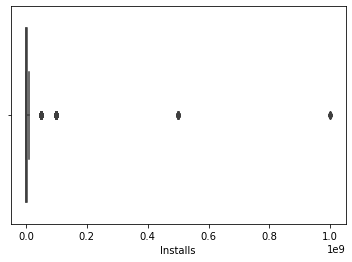

In [27]:
sns.boxplot(df1['Installs'])

In [28]:
df_Install= df1[df1.Installs>10000000]
df1= df1.append(df_Install).drop_duplicates(keep=False)
df1[df1.Installs>10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


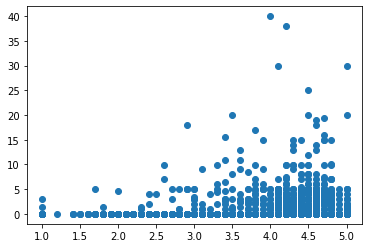

In [29]:
#Bivariate Analysis
plt.scatter(df1['Rating'], df1['Price'])

# As most apps are free it is hard to find co- relation between Rating and price,
#but we can observe that higher priced apps are better rated 


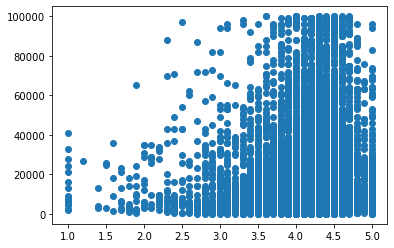

In [30]:
plt.scatter(df1['Rating'], df1['Size'])

# by looking at the scatter plot we can conclude that heavier apps are better rated

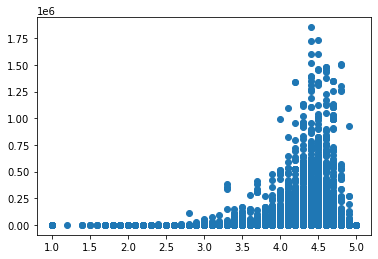

In [31]:
plt.scatter(df1['Rating'], df1['Reviews'])

# by looking at the scatter plot we can conclude that more reviewed apps are better rated

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

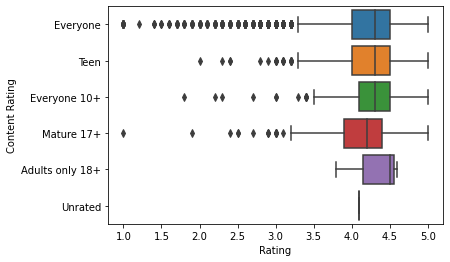

In [32]:
sns.boxplot(df1['Rating'], df1['Content Rating'])

#There is very minor difference in rating of apps according to Content Rating 
#18+ content Rated apps have slightly higher ratings than other apps

<AxesSubplot:xlabel='Rating', ylabel='Category'>

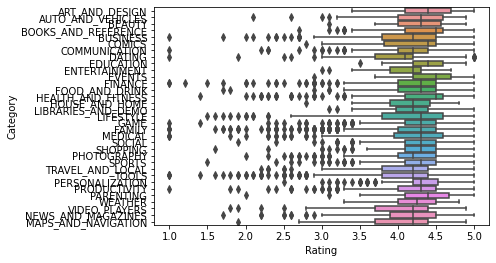

In [33]:
sns.boxplot(df1['Rating'], df1['Category'])

#parenting and Events category has the highest rated apps.

In [34]:
# Data Pre processing
inp1 = df1.copy()

In [35]:
inp1.shape

(7928, 13)

In [36]:
inp1['Reviews'] = inp1['Reviews'].apply(np.log1p)

In [37]:
inp1['Reviews'].describe()

count    7928.000000
mean        7.666779
std         3.452245
min         0.693147
25%         4.812184
50%         7.904335
75%        10.567000
max        14.431985
Name: Reviews, dtype: float64

In [38]:
inp1['Installs'] = inp1['Installs'].apply(np.log1p)

In [39]:
inp1['Installs'].describe()

count    7928.000000
mean       11.604952
std         3.465864
min         1.791759
25%         9.210440
50%        11.512935
75%        13.815512
max        16.118096
Name: Installs, dtype: float64

<AxesSubplot:xlabel='Reviews'>

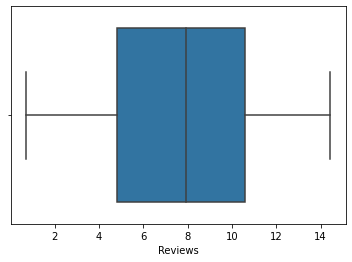

In [40]:
sns.boxplot(inp1['Reviews'])


<AxesSubplot:xlabel='Installs'>

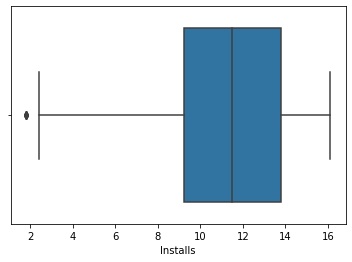

In [41]:
sns.boxplot(inp1['Installs'])

In [42]:
inp1 = inp1.drop(['Android Ver','Current Ver','Last Updated','App'], axis = 1)

In [43]:
inp1 

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design
...,...,...,...,...,...,...,...,...,...
10834,FAMILY,4.0,2.079442,2600.0,6.216606,Free,0.0,Everyone,Education
10836,FAMILY,4.5,3.663562,53000.0,8.517393,Free,0.0,Everyone,Education
10837,FAMILY,5.0,1.609438,3600.0,4.615121,Free,0.0,Everyone,Education
10839,BOOKS_AND_REFERENCE,4.5,4.744932,19000.0,6.908755,Free,0.0,Mature 17+,Books & Reference


In [44]:
inp1.Category.nunique()

33

In [45]:
inp1['Category'].value_counts()

FAMILY                 1614
GAME                    832
TOOLS                   673
FINANCE                 305
LIFESTYLE               291
PERSONALIZATION         288
SPORTS                  279
PRODUCTIVITY            277
MEDICAL                 255
COMMUNICATION           241
HEALTH_AND_FITNESS      239
BUSINESS                238
PHOTOGRAPHY             231
NEWS_AND_MAGAZINES      211
SOCIAL                  199
TRAVEL_AND_LOCAL        182
SHOPPING                174
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           135
DATING                  133
EDUCATION               120
MAPS_AND_NAVIGATION     118
FOOD_AND_DRINK          105
ENTERTAINMENT            93
AUTO_AND_VEHICLES        73
WEATHER                  70
HOUSE_AND_HOME           64
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           60
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [46]:
inp1['Genres'].nunique()

114

In [47]:
# as Genres has very high number of unique values we will drop the Genres column as many values are similar to Category column
inp1 = inp1.drop(['Genres'], axis = 1)


In [48]:
inp1

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone
5,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone
...,...,...,...,...,...,...,...,...
10834,FAMILY,4.0,2.079442,2600.0,6.216606,Free,0.0,Everyone
10836,FAMILY,4.5,3.663562,53000.0,8.517393,Free,0.0,Everyone
10837,FAMILY,5.0,1.609438,3600.0,4.615121,Free,0.0,Everyone
10839,BOOKS_AND_REFERENCE,4.5,4.744932,19000.0,6.908755,Free,0.0,Mature 17+


In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
labelencoder = LabelEncoder()
inp1['Category'] = labelencoder.fit_transform(inp1['Category'])
inp1

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,0,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone
1,0,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone
2,0,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone
4,0,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone
5,0,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone
...,...,...,...,...,...,...,...,...
10834,11,4.0,2.079442,2600.0,6.216606,Free,0.0,Everyone
10836,11,4.5,3.663562,53000.0,8.517393,Free,0.0,Everyone
10837,11,5.0,1.609438,3600.0,4.615121,Free,0.0,Everyone
10839,3,4.5,4.744932,19000.0,6.908755,Free,0.0,Mature 17+


In [51]:
inp1_dummies = pd.get_dummies(inp1[['Type', 'Content Rating']])
inp1_dummies 

,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,1,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0
5,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
10834,1,0,0,1,0,0,0,0
10836,1,0,0,1,0,0,0,0
10837,1,0,0,1,0,0,0,0
10839,1,0,0,0,0,1,0,0


In [52]:
inp1_num = inp1[['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Price']]
inp1_num

,Category,Rating,Reviews,Size,Installs,Price
0,0,4.1,5.075174,19000.0,9.210440,0.0
1,0,3.9,6.875232,14000.0,13.122365,0.0
2,0,4.7,11.379520,8700.0,15.424949,0.0
4,0,4.3,6.875232,2800.0,11.512935,0.0
5,0,4.4,5.123964,5600.0,10.819798,0.0
...,...,...,...,...,...,...
10834,11,4.0,2.079442,2600.0,6.216606,0.0
10836,11,4.5,3.663562,53000.0,8.517393,0.0
10837,11,5.0,1.609438,3600.0,4.615121,0.0
10839,3,4.5,4.744932,19000.0,6.908755,0.0


In [53]:
inp2 = pd.concat([inp1_dummies, inp1_num], axis = 1)
inp2

,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Category,Rating,Reviews,Size,Installs,Price
0,1,0,0,1,0,0,0,0,0,4.1,5.075174,19000.0,9.210440,0.0
1,1,0,0,1,0,0,0,0,0,3.9,6.875232,14000.0,13.122365,0.0
2,1,0,0,1,0,0,0,0,0,4.7,11.379520,8700.0,15.424949,0.0
4,1,0,0,1,0,0,0,0,0,4.3,6.875232,2800.0,11.512935,0.0
5,1,0,0,1,0,0,0,0,0,4.4,5.123964,5600.0,10.819798,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,1,0,0,1,0,0,0,0,11,4.0,2.079442,2600.0,6.216606,0.0
10836,1,0,0,1,0,0,0,0,11,4.5,3.663562,53000.0,8.517393,0.0
10837,1,0,0,1,0,0,0,0,11,5.0,1.609438,3600.0,4.615121,0.0
10839,1,0,0,0,0,1,0,0,3,4.5,4.744932,19000.0,6.908755,0.0


In [54]:
## 
X = inp2.drop(['Rating'], axis = 1)
X

,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Category,Reviews,Size,Installs,Price
0,1,0,0,1,0,0,0,0,0,5.075174,19000.0,9.210440,0.0
1,1,0,0,1,0,0,0,0,0,6.875232,14000.0,13.122365,0.0
2,1,0,0,1,0,0,0,0,0,11.379520,8700.0,15.424949,0.0
4,1,0,0,1,0,0,0,0,0,6.875232,2800.0,11.512935,0.0
5,1,0,0,1,0,0,0,0,0,5.123964,5600.0,10.819798,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,1,0,0,1,0,0,0,0,11,2.079442,2600.0,6.216606,0.0
10836,1,0,0,1,0,0,0,0,11,3.663562,53000.0,8.517393,0.0
10837,1,0,0,1,0,0,0,0,11,1.609438,3600.0,4.615121,0.0
10839,1,0,0,0,0,1,0,0,3,4.744932,19000.0,6.908755,0.0


In [55]:
Y = inp2[['Rating']]
Y

,Rating
0,4.1
1,3.9
2,4.7
4,4.3
5,4.4
...,...
10834,4.0
10836,4.5
10837,5.0
10839,4.5


In [56]:
from sklearn.model_selection import train_test_split 

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 120)



In [58]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5549, 13)
(2379, 13)
(5549, 1)
(2379, 1)


In [59]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [60]:
prediction = lm.predict(X_test).round(1)

prediction

array([[4.4],
       [4. ],
       [4.3],
       ...,
       [4.2],
       [4.5],
       [4.1]])

In [61]:
Y_test

,Rating
343,4.3
3263,3.6
4164,3.0
3865,4.4
2977,4.2
...,...
3499,4.6
3288,4.4
908,3.9
9154,4.3


In [62]:
prediction2 = lm.predict(X_train).round(1)

prediction2

array([[4.2],
       [4.2],
       [4.3],
       ...,
       [4.2],
       [4.2],
       [4. ]])

In [63]:
Y_train

,Rating
5545,4.4
446,4.2
8443,4.4
3316,4.1
7566,4.4
...,...
4948,4.1
1078,4.3
1643,4.4
2703,4.1


In [64]:
from sklearn.metrics import r2_score

In [65]:
r_square_train = r2_score(Y_train, prediction2)
r_square_test = r2_score(Y_test, prediction)   

In [66]:
print(r_square_train)
print(r_square_test)

0.11374548134688556
0.13026013976075224


In [ ]:
## To increase the accuracy we consider margin of error

In [67]:
prediction = pd.DataFrame(prediction)

In [68]:
prediction['Rating'] = prediction.iloc[:,0]
prediction.drop(columns = 0, axis = 1, inplace = True)

In [95]:
prediction2 = pd.DataFrame(prediction2)
prediction2['Rating'] = prediction2.iloc[:,0]
prediction2.drop(columns = 0, axis = 1, inplace = True)

In [104]:
def within_margin(x, y):
    return abs(x - y) <= 0.8

New_predict_test=[]

for x, y in zip(prediction['Rating'], Y_test['Rating']):
    if x == y:
        New_predict_test.append(x)
    elif within_margin(x, y):
        New_predict_test.append(y)
    else:
        New_predict_test.append(x)

len(New_predict_test)

2379

In [105]:
New_predict_train=[]

for x, y in zip(prediction2['Rating'], Y_train['Rating']):
    if x == y:
        New_predict_train.append(x)
    elif within_margin(x, y):
        New_predict_train.append(y)
    else:
        New_predict_train.append(x)

len(New_predict_train)

5549

In [106]:
r_square_train1 = r2_score(Y_train, New_predict_train)
r_square_test1 = r2_score(Y_test, New_predict_test)
print(r_square_train1)
print(r_square_test1)

0.47328982397790176
0.48450600982657976
